In [ ]:

%reload_ext autoreload
%autoreload 2
from utils.data_generator import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.svm_smo_full import *

%reload_ext autoreload
%autoreload 2


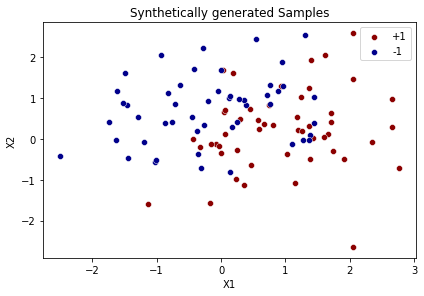

In [29]:
x1, y1, x2, y2 = generate_linearly_separable_data(
    cov=[[0.9, 0.05], [0.05, 0.9]], count=50)
plt.figure()
sns.scatterplot(x=x1[:, 0], y=x1[:, 1], label='+1', color='darkred')
sns.scatterplot(x=x2[:, 0], y=x2[:, 1], label='-1', color='darkblue')
plt.xlabel('X1'), plt.ylabel('X2'), plt.tight_layout(
), plt.title('Synthetically generated Samples')
plt.show()


In [30]:
X_train = np.vstack((x1, x2))
Y_train = np.hstack((y1, y2))


In [48]:
model = SVM_SMO_FULL(C=1e1,kernel='rbf',gamma=1e3)
model.fit(X_train,Y_train,epsilon=1e-3,max_passes=10)

model.score(X_train,Y_train)[1]

0.99

In [34]:
from utils.svm_libsvm import *
model =SVM_LIBSVM(C=1e1,kernel='rbf',gamma=1e3)
model.fit(X_train,Y_train)
model.score(X_train,Y_train)[1]

0.99

In [37]:
from utils.svm_cvx import *
model = SVM_CVX(C=1e1, kernel='rbf', gamma=1e3)
model.fit(X_train, Y_train)
model.score(X_train, Y_train)[1]


0.99

In [50]:
from utils.svm_smo_simple import *
model =SVM_SMO_SIMPLE(C=1e1,kernel='rbf',gamma=1e3)
model.fit(X_train,Y_train,max_passes=10)
model.score(X_train,Y_train)[1]

0.99